In [1]:
import cv2 as cv
import numpy as np
import random
from PIL import Image
from tensorflow.keras.utils import normalize
import keras
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

seed = 42
SIZE = 256
seg = keras.models.load_model('vessel_seg_256.h5')



In [2]:
root = 'D:/Work/Retinopathy/eye dataset/Retina vessel/full data/'
os.listdir(root)

['agmtdgt', 'agmtdim', 'gt', 'images', 'test']

In [3]:
root = 'D:/Work/Retinopathy/eye dataset/Retina vessel/full data/test/'
image_directory = os.path.join(root, 'images/')
mask_directory = os.path.join(root , 'gt/')

In [33]:
os.listdir(image_directory)

['23_training.tif',
 '29_training.tif',
 '34_training.tif',
 'im0005.png',
 'im0044.png',
 'im0139.png',
 'im0240.png',
 'im0291.png']

In [4]:
def test_on_image1(img_array, img_num, img_side_size = 256):
    
    #pred = model.predict(img_array[img_num].reshape(1,img_side_size,img_side_size))
    pred = img_array[img_num]
    pred[pred>0.5] = 1
    pred[pred<0.5] = 0
    pred1 = pred.reshape(img_side_size, img_side_size)
    #cv.imwrite('pred1.jpg',pred1)
    #plt.imshow(pred1, cmap = 'gray')
    #plt.show()
    return pred1 

In [56]:
dire = os.path.join(image_directory,'29_training.tif')
dire

'D:/Work/Retinopathy/eye dataset/Retina vessel/full data/test/images/29_training.tif'

In [57]:
dire = image_directory + '29_training.tif'
image_dataset = []
src = cv.imread(dire)
image = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
image = Image.fromarray(image)
image = image.resize((SIZE, SIZE))
image_dataset.append(np.array(image))

In [58]:
image_dataset = np.expand_dims(normalize(np.array(image_dataset), axis=1),3)

In [59]:
image_dataset.shape

(1, 256, 256, 1)

In [60]:
pred = seg.predict(image_dataset)

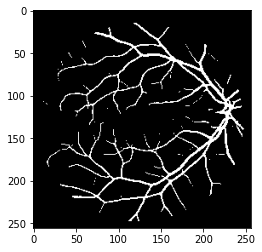

In [61]:
#test_on_image1(pred,0)
pred_mask = test_on_image1(pred,0)  
plt.imsave('pred_mask2.png',pred_mask, cmap = 'gray')
pred_image =cv.imread('pred_mask2.png',0)
_,pr_th = cv.threshold(pred_image, 220,255, cv.THRESH_BINARY)

os.remove("pred_mask2.png")
plt.imshow(pr_th, cmap='gray')
plt.show()

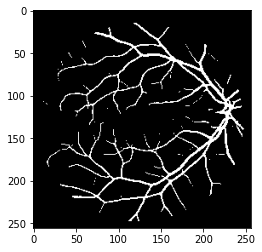

In [62]:
plt.imshow(pr_th,cmap='gray')
plt.show()

In [64]:
disc_c1 = cv.morphologyEx(pr_th, cv.MORPH_CLOSE, (9,9), iterations = 2)
disc_o1 = cv.morphologyEx(pr_th, cv.MORPH_OPEN,(3,3), iterations = 1)

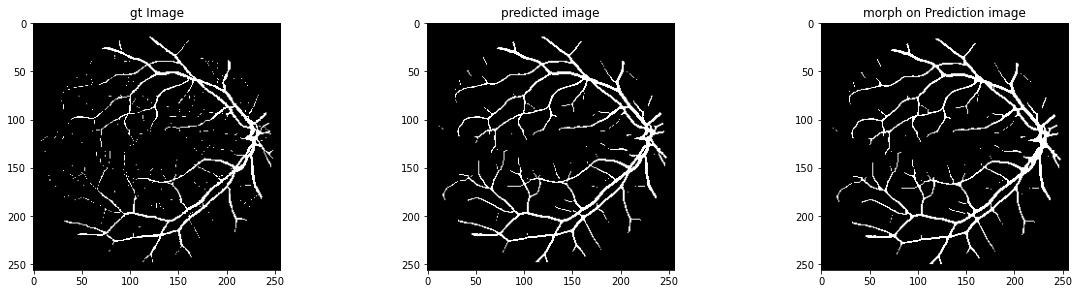

In [72]:
plt.figure(figsize=(20,10))
plt.subplot(231)
plt.title('gt Image')
plt.imshow(gt_th_256, cmap='gray')
plt.subplot(232)
plt.title('predicted image')
plt.imshow(pr_th, cmap='gray')
plt.subplot(233)
plt.title('morph on Prediction image')
plt.imshow(disc_c1, cmap='gray')
plt.show()

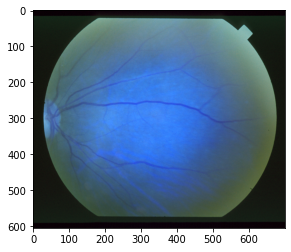

In [16]:
plt.imshow(src, cmap='gray')
plt.show()

In [43]:
os.listdir(mask_directory)

['23_manual1.png',
 '29_manual1.png',
 '34_manual1.png',
 'im0005.png',
 'im0044.png',
 'im0139.png',
 'im0240.png',
 'im0291.png']

In [68]:
gt = cv.imread(mask_directory + '29_manual1.png',0)
gt_256 = cv.resize(gt, (256,256))
gt_512 = cv.resize(gt, (512,512))
_,gt_th_256 = cv.threshold(gt_256, 220,255, cv.THRESH_BINARY)
_,gt_th_512 = cv.threshold(gt_512, 220,255, cv.THRESH_BINARY)
#cv.imshow('image gt 256', gt_th_256)
#cv.imshow('image gt 512', gt_th_512)
#cv.waitKey(0)
#cv.destroyAllWindows()
#print(gt_th.shape)
#plt.imshow(gt_th, cmap='gray')
#plt.show()

In [66]:
intersection = np.logical_and(pr_th, gt_th_256)
union = np.logical_or(pr_th, gt_th_256)
iou_score = np.sum(intersection) / np.sum(union)
print("IoU socre is: ", iou_score)

IoU socre is:  0.6294899425287356
